<a href="https://colab.research.google.com/github/homa-abedin/ML/blob/master/EX2J1P4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_labels.shape

(60000,)

In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
train_images.shape

(60000, 28, 28)

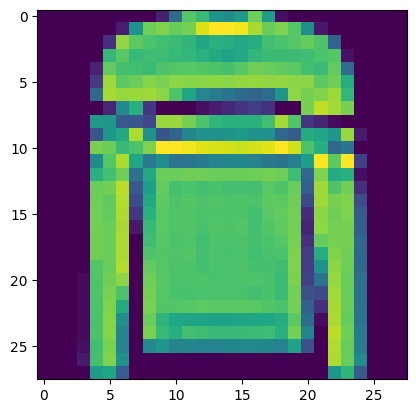

2


In [ ]:
plt.imshow(train_images[5])
plt.show()
print(train_labels[5])

In [ ]:
X_train_5by5 = [cv2.resize(img, dsize=(5, 5)) for img in train_images]
X_test_5by_5 = [cv2.resize(img, dsize=(5, 5)) for img in test_images]

In [ ]:
X_train = np.reshape(X_train_5by5, [-1,5**2])
X_test = np.reshape(X_test_5by_5, [-1,5**2])

In [ ]:
X_train.shape

(60000, 25)

In [ ]:
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
y_train = keras.utils.to_categorical(train_labels, num_classes=X_train.shape[-1])
y_test = keras.utils.to_categorical(test_labels, num_classes=X_test.shape[-1])

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=25))
model.add(Dense(68, activation='relu'))
model.add(Dense(25, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
          epochs=100,
          batch_size=128, validation_data=(x_test, y_test))

Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 1.0045 - accuracy: 0.6722 - val_loss: 0.7561 - val_accuracy: 0.7289
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.7160 - accuracy: 0.7426 - val_loss: 0.7235 - val_accuracy: 0.7377
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.6762 - accuracy: 0.7549 - val_loss: 0.6695 - val_accuracy: 0.7569
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.6472 - accuracy: 0.7649 - val_loss: 0.6536 - val_accuracy: 0.7617
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.6240 - accuracy: 0.7723 - val_loss: 0.6468 - val_accuracy: 0.7634
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.6056 - accuracy: 0.7779 - val_loss: 0.6254 - val_accuracy: 0.7691
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.5917 - accuracy: 0.7829 - val_loss: 0.6201 - val_accuracy: 0.7756

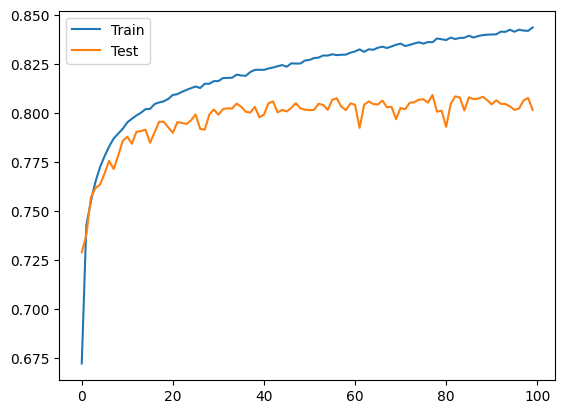

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.legend()
plt.show()